This is one of the projects from HW2 Topics 2 from last week.

I am doing it for extra credit.

The link to the tutorial is [here](https://towardsai.net/p/nlp/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0).

In [ ]:
# Import required libraries for nlp models, plotting, token preprocessing , etc...

import matplotlib.pyplot as plt

%matplotlib inline
import nltk
nltk.download('all')
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.probability import FreqDist

from wordcloud import WordCloud
import numpy as np
from PIL import Image

from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [ ]:
text_file = open("/content/drive/MyDrive/NLP Tutorial text file.applescript")
text = text_file.read()

print(type(text), len(text))
print(text)

<class 'str'> 675
Once upon a time there was an old mother pig who had three little pigs and not enough food to feed them. So when they were old enough, she sent them out into the world to seek their fortunes.

The first little pig was very lazy. He didn't want to work at all and he built his house out of straw. The second little pig worked a little bit harder but he was somewhat lazy too and he built his house out of sticks. Then, they sang and danced and played together the rest of the day.

The third little pig worked hard all day and built his house with bricks. It was a sturdy house complete with a fine fireplace and chimney. It looked like it could withstand the strongest winds.


In [ ]:
sentences = sent_tokenize(text)

# the above line did not work in the beginning, so i searched stackoverflow and found that 
# i need to download 'punk' package through nltk.download('punkt') from nltk for the tokenizer to work

print(len(sentences))
print(sentences)

words = word_tokenize(text)
print(len(words))
print(words)

9
['Once upon a time there was an old mother pig who had three little pigs and not enough food to feed them.', 'So when they were old enough, she sent them out into the world to seek their fortunes.', 'The first little pig was very lazy.', "He didn't want to work at all and he built his house out of straw.", 'The second little pig worked a little bit harder but he was somewhat lazy too and he built his house out of sticks.', 'Then, they sang and danced and played together the rest of the day.', 'The third little pig worked hard all day and built his house with bricks.', 'It was a sturdy house complete with a fine fireplace and chimney.', 'It looked like it could withstand the strongest winds.']
144
['Once', 'upon', 'a', 'time', 'there', 'was', 'an', 'old', 'mother', 'pig', 'who', 'had', 'three', 'little', 'pigs', 'and', 'not', 'enough', 'food', 'to', 'feed', 'them', '.', 'So', 'when', 'they', 'were', 'old', 'enough', ',', 'she', 'sent', 'them', 'out', 'into', 'the', 'world', 'to', 'see

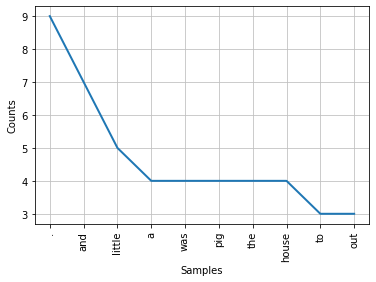

In [ ]:
fdist = FreqDist(words)
fdist.most_common(10)
fdist.plot(10) # .plot is a method in the nltk library (not matplotlib.pyplot) and
              # so it has different parameters which are just passing in the number of most common words to plot on
              # the frquency distribution graph

132
['once', 'upon', 'a', 'time', 'there', 'was', 'an', 'old', 'mother', 'pig', 'who', 'had', 'three', 'little', 'pigs', 'and', 'not', 'enough', 'food', 'to', 'feed', 'them', 'so', 'when', 'they', 'were', 'old', 'enough', 'she', 'sent', 'them', 'out', 'into', 'the', 'world', 'to', 'seek', 'their', 'fortunes', 'the', 'first', 'little', 'pig', 'was', 'very', 'lazy', 'he', 'did', 'want', 'to', 'work', 'at', 'all', 'and', 'he', 'built', 'his', 'house', 'out', 'of', 'straw', 'the', 'second', 'little', 'pig', 'worked', 'a', 'little', 'bit', 'harder', 'but', 'he', 'was', 'somewhat', 'lazy', 'too', 'and', 'he', 'built', 'his', 'house', 'out', 'of', 'sticks', 'then', 'they', 'sang', 'and', 'danced', 'and', 'played', 'together', 'the', 'rest', 'of', 'the', 'day', 'the', 'third', 'little', 'pig', 'worked', 'hard', 'all', 'day', 'and', 'built', 'his', 'house', 'with', 'bricks', 'it', 'was', 'a', 'sturdy', 'house', 'complete', 'with', 'a', 'fine', 'fireplace', 'and', 'chimney', 'it', 'looked', 'lik

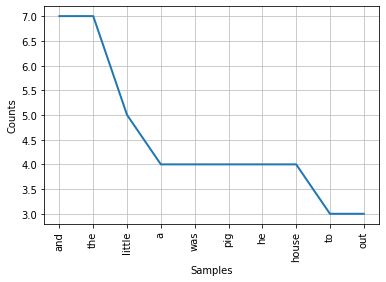

In [ ]:
words_no_punc = []
for w in words:
  if w.isalpha():
    words_no_punc.append(w.lower())

print(len(words_no_punc))
print(words_no_punc)

fdist = FreqDist(words_no_punc)
print(fdist.most_common(10))
fdist.plot(10)

In [ ]:
stop_words = stopwords.words('english') # for this to work we needed to do nltk.download('corpus'), so i removed the previous
                                      # download as nltk.download(['stopwords', 'punkt']) would download everything we need up to now
# underscore put between stop and words to make the machine not confuse the variable with the imported class/object
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
clean_words = []

for i in words_no_punc:
  if i not in stop_words:
    clean_words.append(i)

print(clean_words)
print(len(clean_words))

['upon', 'time', 'old', 'mother', 'pig', 'three', 'little', 'pigs', 'enough', 'food', 'feed', 'old', 'enough', 'sent', 'world', 'seek', 'fortunes', 'first', 'little', 'pig', 'lazy', 'want', 'work', 'built', 'house', 'straw', 'second', 'little', 'pig', 'worked', 'little', 'bit', 'harder', 'somewhat', 'lazy', 'built', 'house', 'sticks', 'sang', 'danced', 'played', 'together', 'rest', 'day', 'third', 'little', 'pig', 'worked', 'hard', 'day', 'built', 'house', 'bricks', 'sturdy', 'house', 'complete', 'fine', 'fireplace', 'chimney', 'looked', 'like', 'could', 'withstand', 'strongest', 'winds']
65


[('little', 5), ('pig', 4), ('house', 4), ('built', 3), ('old', 2), ('enough', 2), ('lazy', 2), ('worked', 2), ('day', 2), ('upon', 1)]


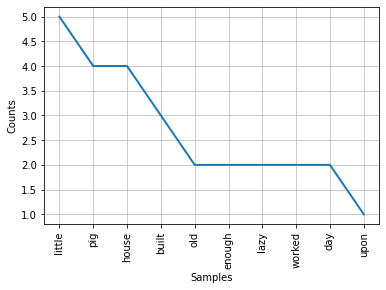

In [ ]:
fdist = FreqDist(clean_words)
print(fdist.most_common(10))
fdist.plot(10)

# we finished preprocessing data to get the useful, meaningful words out of our text

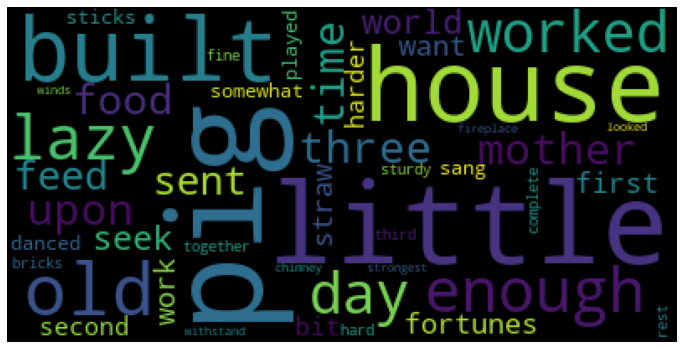

In [ ]:
word_cloud = WordCloud().generate(text)
plt.figure(figsize=(12, 12))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

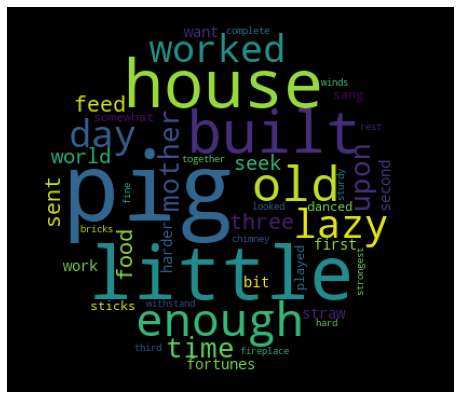

In [ ]:
# to make word cloud in circle shape or any other shape
char_mask = np.array(Image.open("/content/drive/MyDrive/circle.png"))
word_cloud = WordCloud(background_color = "black", mask = char_mask).generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [ ]:
# different form of the same word exist, like "study" and 'studying', despite them having the same meaning, 
# therefore these similar words need to be changed into a base / single word  --- called stemming

# from a google search, it seems to be that snowball stemmer is better than porter stemmer (due to being faster and more agressive),
# so i will use snowball stemmer

print(clean_words)

snowball = SnowballStemmer('english')
for ind, i in enumerate(clean_words):
  clean_words[ind] = snowball.stem(i)

print(clean_words)

for i in ["study", "studied", "studying", "dancing", "send", "danced", "sending", "sent", "dance", "danced"]:
  print(snowball.stem(i))

['upon', 'time', 'old', 'mother', 'pig', 'three', 'little', 'pigs', 'enough', 'food', 'feed', 'old', 'enough', 'sent', 'world', 'seek', 'fortunes', 'first', 'little', 'pig', 'lazy', 'want', 'work', 'built', 'house', 'straw', 'second', 'little', 'pig', 'worked', 'little', 'bit', 'harder', 'somewhat', 'lazy', 'built', 'house', 'sticks', 'sang', 'danced', 'played', 'together', 'rest', 'day', 'third', 'little', 'pig', 'worked', 'hard', 'day', 'built', 'house', 'bricks', 'sturdy', 'house', 'complete', 'fine', 'fireplace', 'chimney', 'looked', 'like', 'could', 'withstand', 'strongest', 'winds']
['upon', 'time', 'old', 'mother', 'pig', 'three', 'littl', 'pig', 'enough', 'food', 'feed', 'old', 'enough', 'sent', 'world', 'seek', 'fortun', 'first', 'littl', 'pig', 'lazi', 'want', 'work', 'built', 'hous', 'straw', 'second', 'littl', 'pig', 'work', 'littl', 'bit', 'harder', 'somewhat', 'lazi', 'built', 'hous', 'stick', 'sang', 'danc', 'play', 'togeth', 'rest', 'day', 'third', 'littl', 'pig', 'work

In [ ]:
snowball = SnowballStemmer('english')
for i in ["study", "studied", "studying", "dancing", "send", "danced", "sending", "sent", "dance", "danced"]:
  print(snowball.stem(i))

# stemming of 'send', and 'sent' is different despite them having similar meaning - why is this? - because stemmers on truncate words and don't find the original dictionary word

studi
studi
studi
danc
send
danc
send
sent
danc
danc


In [ ]:
lemmatizer = WordNetLemmatizer()
for i in ["study", "studied", "studying", "studies"]:
  print(lemmatizer.lemmatize(i))

study
studied
studying
study


In [ ]:
# PoS (Part of speech) tagging is very important to determine the meaning of a words and its position in a sentence.

tag = nltk.pos_tag(['i', 'laugh'])
tag

sentence2 = 'A very small cute puppy is walking in the park'

words_sentence2 = word_tokenize(sentence2)

tags = nltk.pos_tag(words_sentence2)
print(tags)

[('A', 'DT'), ('very', 'RB'), ('small', 'JJ'), ('cute', 'NN'), ('puppy', 'NN'), ('is', 'VBZ'), ('walking', 'VBG'), ('in', 'IN'), ('the', 'DT'), ('park', 'NN')]


In [ ]:
# chunking = extracting meaningful phrases from unstructured text given the grammer rule for that phrase

# it takes in the PoS tagged text and outputs the location of your desired phrase


# extracting noune phrase from text
# ? - optional charactar
# * - 0 or more repetitions

grammer = "NP: {<DT>?<JJ>*<NN>}"

# creating a parser

parser = nltk.RegexpParser(grammer)

output = parser.parse(tags)
print(output)

# we can also visualize the output

# output.draw() # this outputs an error and soes not want to work despite using stackover flow help to try to make it work

(S
  A/DT
  very/RB
  (NP small/JJ cute/NN)
  (NP puppy/NN)
  is/VBZ
  walking/VBG
  in/IN
  (NP the/DT park/NN))


In [ ]:
# Chinking is used to exclude a part of our chunk

# * - 0 or more repetitions
# + - 1 or more repetitions

grammer = r""""NP: {<.*>+}
}<JJ>+{"""
# the chunk and chink rule need to be in different lines
parser = nltk.RegexpParser(grammer)

output = parser.parse(tags)
print(output)

(S
  ("NP A/DT very/RB)
  small/JJ
  ("NP cute/NN puppy/NN is/VBZ walking/VBG in/IN the/DT park/NN))


In [ ]:
# Named Entity Recognition

sentence = "Mr. Smith made a deal on a beach of Switzerland near WHO"

words = word_tokenize(sentence)

tagged_words = nltk.pos_tag(words)

# Named Entity Recognition
N_E_R = nltk.ne_chunk(tagged_words, binary = False) # when binary = True, the output will only identify wether a particular
                                                    # entity is a named entity or not. If binary = False then the output
                                                    # will also tell you the type of named entity found
print(N_E_R)

(S
  (PERSON Mr./NNP)
  (PERSON Smith/NNP)
  made/VBD
  a/DT
  deal/NN
  on/IN
  a/DT
  beach/NN
  of/IN
  (GPE Switzerland/NNP)
  near/IN
  (ORGANIZATION WHO/NNP))


In [ ]:
# WordNet

for word in wordnet.synsets("fun"): # from the output i understood that this prints out the different variation of the word 'fun' as the word has different meanings
  print(word)

for word in wordnet.synsets("fun"):
  for lemma in word.lemmas(): # i had to look up what lemma is. it is essentially the main form of a set of similar words (i.e. synonyms)
    print(lemma)
  print('\n')


Synset('fun.n.01')
Synset('fun.n.02')
Synset('fun.n.03')
Synset('playfulness.n.02')
Lemma('fun.n.01.fun')
Lemma('fun.n.01.merriment')
Lemma('fun.n.01.playfulness')


Lemma('fun.n.02.fun')
Lemma('fun.n.02.play')
Lemma('fun.n.02.sport')


Lemma('fun.n.03.fun')


Lemma('playfulness.n.02.playfulness')
Lemma('playfulness.n.02.fun')




In [ ]:
word = wordnet.synsets('Play')

print(word[0].name())
print(word[0].definition())
print(word[0].examples())

play.n.01
a dramatic work intended for performance by actors on a stage
['he wrote several plays but only one was produced on Broadway']


In [ ]:
for word in wordnet.synsets("fun"):
  print(word.name())
  print(word.definition())
  print(word.examples())

  for lemma in word.lemmas():
    print(lemma)
  print("\n")

fun.n.01
activities that are enjoyable or amusing
['I do it for the fun of it', 'he is fun to have around']
Lemma('fun.n.01.fun')
Lemma('fun.n.01.merriment')
Lemma('fun.n.01.playfulness')


fun.n.02
verbal wit or mockery (often at another's expense but not to be taken seriously)
['he became a figure of fun', 'he said it in sport']
Lemma('fun.n.02.fun')
Lemma('fun.n.02.play')
Lemma('fun.n.02.sport')


fun.n.03
violent and excited activity
['she asked for money and then the fun began', 'they began to fight like fun']
Lemma('fun.n.03.fun')


playfulness.n.02
a disposition to find (or make) causes for amusement
['her playfulness surprised me', 'he was fun to be with']
Lemma('playfulness.n.02.playfulness')
Lemma('playfulness.n.02.fun')




In [ ]:
# hypernyms give an abstract term representing the word

word = wordnet.synsets("play")

print(word[0].hypernyms())

# to get name only

print(word[0].lemmas()[0].name())

# getting synonyms

synonyms = []

for word in wordnet.synsets('fun'):
  for lemma in word.lemmas():
    synonyms.append(lemma.name())

print(synonyms)

antonyms = []

for word in wordnet.synsets('exciting'):
  for lemma in word.lemmas():
    if lemma.antonyms():
      antonyms.append(lemma.antonyms()[0].name())
print(antonyms)

[Synset('dramatic_composition.n.01')]
play
['fun', 'merriment', 'playfulness', 'fun', 'play', 'sport', 'fun', 'playfulness', 'fun']
['stifle', 'calm', 'unexciting']


In [ ]:
# finding the similarity between words

word1 = wordnet.synsets("ship", "n")[0] # the 'n' argument lets you constrain the part of speech of the word (in this case we are only looking for nouns) - found after a google search

word2 = wordnet.synsets('bike', 'n')[0]

print(word1.wup_similarity(word2))

0.6956521739130435


In [ ]:
# Bag Of Words Method - records words in sentences and their count - problems: does not take into account the 

from sklearn.feature_extraction.text import CountVectorizer

sentences = ["Jim and Pam travelled by the bus:", "The train was late", "The flight was full. Travelling by flight is expensive"]

cv = CountVectorizer()

B_O_W = cv.fit_transform(sentences).toarray()

print(B_O_W)
print(cv.vocabulary_) # prints and the words and their index in the model

print(cv.get_feature_names())

print(B_O_W)


[[1 1 1 0 0 0 0 1 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 1]
 [0 0 1 1 2 1 1 0 0 0 1 0 0 1 1]]
{'jim': 7, 'and': 0, 'pam': 9, 'travelled': 12, 'by': 2, 'the': 10, 'bus': 1, 'train': 11, 'was': 14, 'late': 8, 'flight': 4, 'full': 5, 'travelling': 13, 'is': 6, 'expensive': 3}
['and', 'bus', 'by', 'expensive', 'flight', 'full', 'is', 'jim', 'late', 'pam', 'the', 'train', 'travelled', 'travelling', 'was']
[[1 1 1 0 0 0 0 1 0 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 1 0 0 1]
 [0 0 1 1 2 1 1 0 0 0 1 0 0 1 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# TF-IDF score is used to measure how important or relevent a term/word is in a given document
# TF stands for frequency of term in text
# IDF tells us how frequently a certain word appears in all the sentences in our document
# very useful scoring measure and i may use it for my final project as i may need to compare two text data in my final project and identify the most import terms

from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ["i want to learn about natural language processing", "Natural Language Processing (NLP) with Python — Tutorial – Towards AI"]

vectorizer = TfidfVectorizer(norm = None)

X = vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())

print(X)
print(X[0][2])




{'want': 11, 'to': 8, 'learn': 3, 'about': 0, 'natural': 4, 'language': 2, 'processing': 6, 'nlp': 5, 'with': 12, 'python': 7, 'tutorial': 10, 'towards': 9, 'ai': 1}
['about', 'ai', 'language', 'learn', 'natural', 'nlp', 'processing', 'python', 'to', 'towards', 'tutorial', 'want', 'with']
[[1.40546511 0.         1.         1.40546511 1.         0.
  1.         0.         1.40546511 0.         0.         1.40546511
  0.        ]
 [0.         1.40546511 1.         0.         1.         1.40546511
  1.         1.40546511 0.         1.40546511 1.40546511 0.
  1.40546511]]
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
